In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("dados/Credito.csv",sep = ';', encoding = 'cp860')

In [4]:
df.head()

,CHEQUEESPECIAL,USO_CREDITO,HISTORICO_CREDITO,PROPOSITO,BALANCO_ATUAL,BALANCO_MEDIO_CREDITO,EMPREGADO,LOCAL,ESTADOCIVIL,OUTRASFUNCOES,RESIDENCIADESDE,TIPOSBENS,IDADE,OUTROSPLANOSPGTO,RESIDENCIA,CREDITOSEXISTENTES,EMPREGO,DEPENDENTES,TRABAESTRANGEIRO,CLASSE
0,<0,6,crφtica / outros de crΘdito existente,Computador/TV,1169,nenhuma economia conhecida,>=7,4,masculino solteiro,nenhum,4,bens im≤veis,67,nenhum,pr≤pria,2,especializado,1,sim,bom
1,0<=X<200,48,existente e pago,Computador/TV,5951,<100,1<=X<4,2,fem div/cas,nenhum,2,bens im≤veis,22,nenhum,pr≤pria,1,especializado,1,sim,ruim
2,sem cheque,12,crφtica / outros de crΘdito existente,educaτπo,2096,<100,4<=X<7,2,masculino solteiro,nenhum,3,bens im≤veis,49,nenhum,pr≤pria,1,nπo especializado,2,sim,bom
3,<0,42,existente e pago,mobilia/equipamento,7882,<100,4<=X<7,2,masculino solteiro,fiador,4,seguro de vida,45,nenhum,gratuitamente,1,especializado,2,sim,bom
4,<0,24,atrasos anteriores,carro novo,4870,<100,1<=X<4,3,masculino solteiro,nenhum,4,nenhuma conhecida,53,nenhum,gratuitamente,2,especializado,2,sim,ruim


In [5]:
df.isnull().sum().sum()

0

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

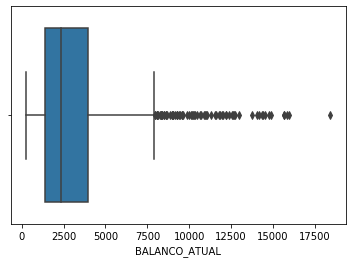

In [7]:
sns.boxplot(df['BALANCO_ATUAL'])

In [10]:
len(df[df['BALANCO_ATUAL'] > 15000])

5

{'whiskers': [<matplotlib.lines.Line2D at 0x1f203fd0c48>,
 'caps': [<matplotlib.lines.Line2D at 0x1f20412e788>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1f2040f71c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f204131708>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f204131ec8>],
 'means': []}

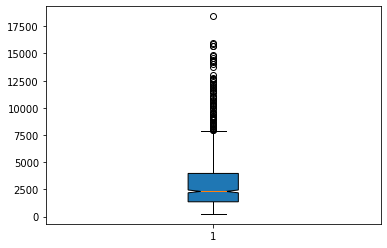

In [14]:
plt.boxplot(df.BALANCO_ATUAL, vert = True, showfliers = True, notch = True,
            patch_artist = True)

In [16]:
valor = df['BALANCO_ATUAL']

In [17]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 -1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [19]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
df_new = df[selecao]

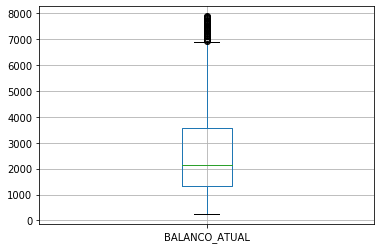

In [21]:
df_new.boxplot(['BALANCO_ATUAL'])
plt.rc('figure', figsize = (14, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2065C0148>]],
      dtype=object)

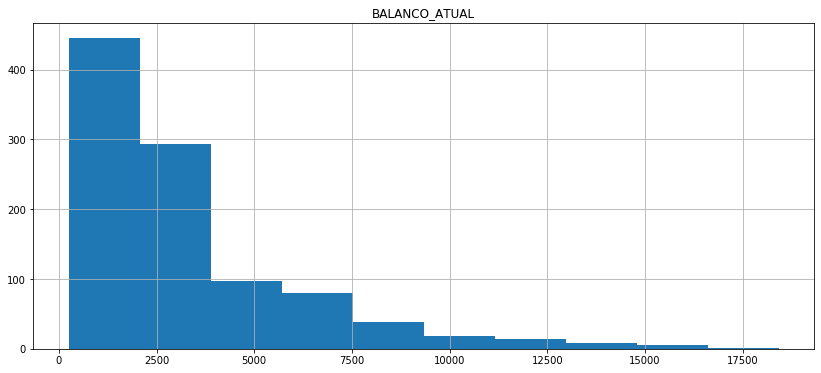

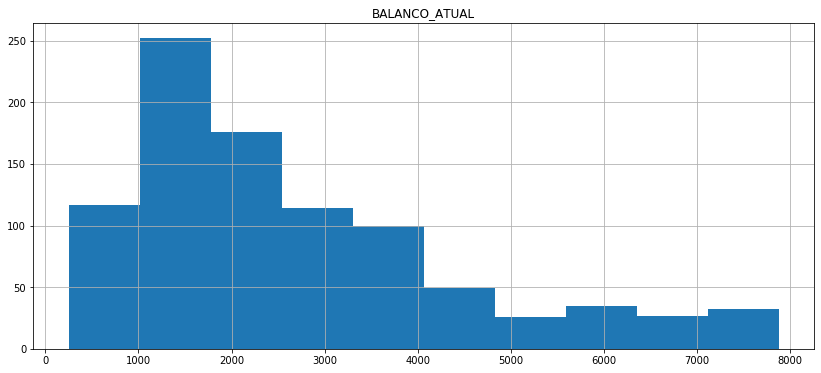

In [22]:
df.hist(['BALANCO_ATUAL'])
df_new.hist(['BALANCO_ATUAL'])

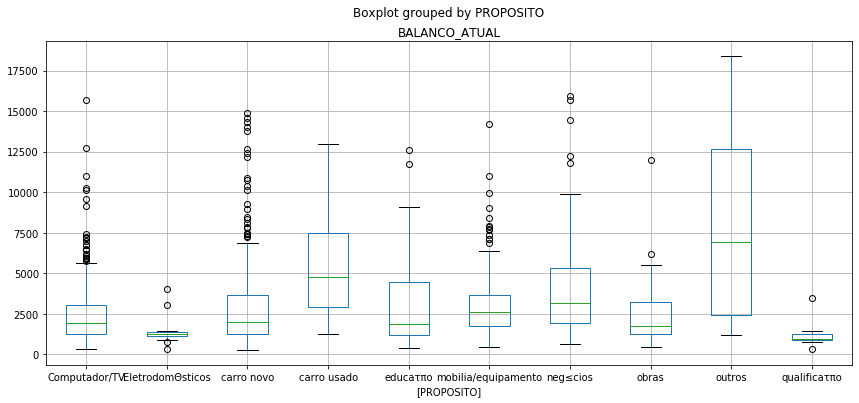

In [23]:
df.boxplot(['BALANCO_ATUAL'], by=['PROPOSITO'])

In [24]:
grupo_tipo = df.groupby('PROPOSITO')['BALANCO_ATUAL']

In [25]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [26]:
Q1

PROPOSITO
Computador/TV          1261.00
EletrodomΘsticos       1131.25
carro novo             1241.50
carro usado            2917.00
educaτπo               1198.25
mobilia/equipamento    1747.00
neg≤cios               1908.00
obras                  1214.50
outros                 2410.50
qualificaτπo            894.00
Name: BALANCO_ATUAL, dtype: float64

In [27]:
Q3

PROPOSITO
Computador/TV           3038.00
EletrodomΘsticos        1359.50
carro novo              3632.50
carro usado             7498.00
educaτπo                4425.25
mobilia/equipamento     3643.00
neg≤cios                5293.00
obras                   3203.25
outros                 12649.00
qualificaτπo            1238.00
Name: BALANCO_ATUAL, dtype: float64

In [28]:
IIQ

PROPOSITO
Computador/TV           1777.00
EletrodomΘsticos         228.25
carro novo              2391.00
carro usado             4581.00
educaτπo                3227.00
mobilia/equipamento     1896.00
neg≤cios                3385.00
obras                   1988.75
outros                 10238.50
qualificaτπo             344.00
Name: BALANCO_ATUAL, dtype: float64

In [29]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = df['PROPOSITO'] == tipo
    eh_dentro_limite = (df['BALANCO_ATUAL'] >= limite_inferior[tipo]) &(df['BALANCO_ATUAL'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = df[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

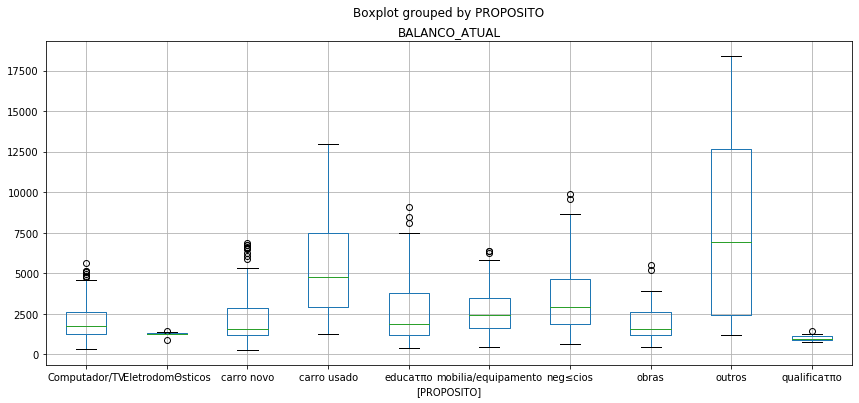

In [30]:
dados_new.boxplot(['BALANCO_ATUAL'], by = ['PROPOSITO'])

In [31]:
dados_new.to_csv('credito_sem_outliers.csv', sep=';', index=False)